In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [3]:
#import data
df= pd.read_excel(r'/Users/jessiecai/Desktop/筆試題目/3-2.xlsx')
df.head()

,date,price,quote,volume,fi_over,fi_per,cr_over,se_over,finan_diff,lend_diff,over_1000
0,2020-08-07,174.0,-1.69,28025,-29.6,33.2,-813.0,-624.0,-1667,-29,63.96
1,2020-07-31,177.0,5.36,20450,-1455.0,33.2,1065.0,175.0,100,68,64.24
2,2020-07-24,168.0,7.69,32323,2975.0,33.6,-180.0,534.0,1070,-160,64.03
3,2020-07-17,156.0,0.00,28737,-1752.0,32.6,841.0,-271.0,228,-696,62.15
4,2020-07-10,156.0,-6.31,24375,-888.0,33.2,-988.0,-1289.0,-473,-67,61.84


In [4]:
data=df.drop(['date'], axis=1)
data.index=df.date

In [5]:
# 缺失值處理
data[data.isnull().values==True] 

df_na= data.dropna(axis=0)
df1=df_na.reindex(index=df_na.index[::-1])
df1.tail()

,price,quote,volume,fi_over,fi_per,cr_over,se_over,finan_diff,lend_diff,over_1000
date,,,,,,,,,,
2020-07-10,156.0,-6.31,24375,-888.0,33.2,-988.0,-1289.0,-473,-67,61.84
2020-07-17,156.0,0.00,28737,-1752.0,32.6,841.0,-271.0,228,-696,62.15
2020-07-24,168.0,7.69,32323,2975.0,33.6,-180.0,534.0,1070,-160,64.03
2020-07-31,177.0,5.36,20450,-1455.0,33.2,1065.0,175.0,100,68,64.24
2020-08-07,174.0,-1.69,28025,-29.6,33.2,-813.0,-624.0,-1667,-29,63.96


//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


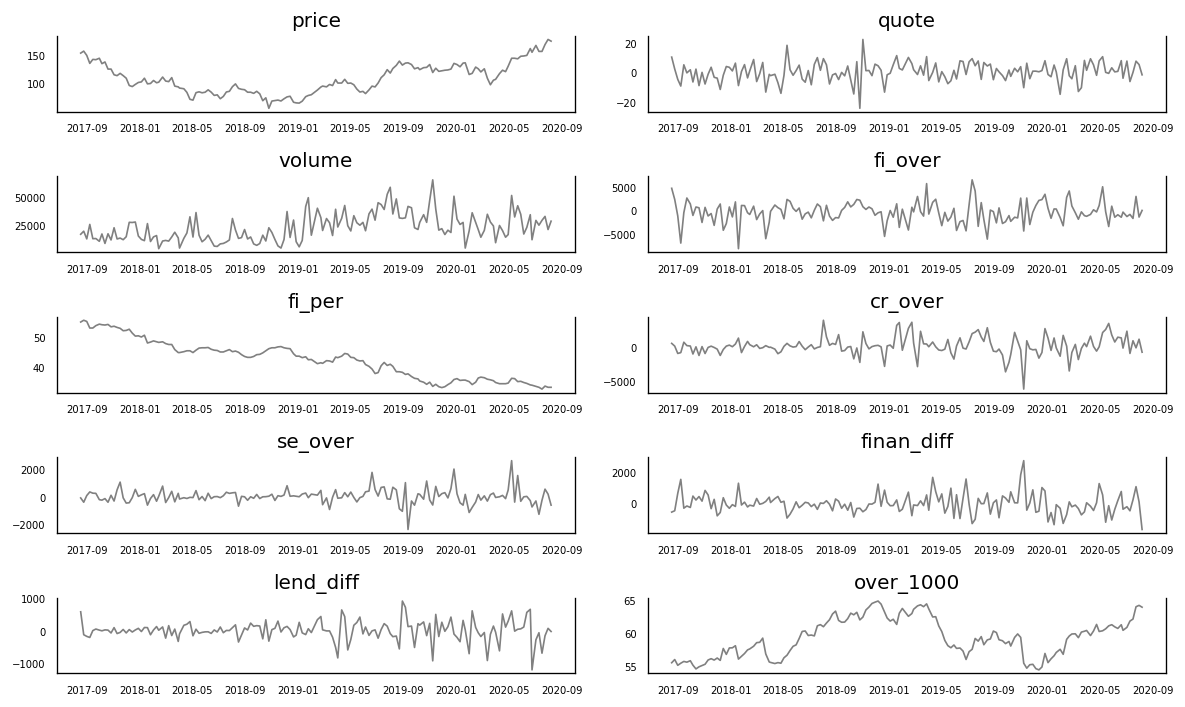

In [6]:
# Plot
fig, axes= plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    data1=df1[df1.columns[i]]
    ax.plot(data1, color='grey', linewidth=1)
    ax.set_title(df1.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout()

In [7]:
# Granger's Causality Test
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test= 'ssr_chi2test'
def granger_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    df= pd.DataFrame(np.zeros((len(variables), len(variables))), columns= variables, index= variables)
    for c in df.columns:
        for r in df.index:
            test_result= grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values= [round(test_result[i+1][0][test][1], 4) for i in range(maxlag)]
            if verbose: print(f'Y={r}, X={c}, P Value={p_values}')
            min_p_value=np.min(p_values)
            df.loc[r, c]=min_p_value
    df.columns= [var+'_x' for var in variables]
    df.index= [var+'_y' for var in variables]
    return df

gcm=granger_causation_matrix(df1, variables= df1.columns)
gcm

,price_x,quote_x,volume_x,fi_over_x,fi_per_x,cr_over_x,se_over_x,finan_diff_x,lend_diff_x,over_1000_x
price_y,1.0000,0.1993,0.0184,0.1096,0.0007,0.3328,0.0519,0.1245,0.3477,0.4233
quote_y,0.1072,1.0000,0.1554,0.1498,0.0285,0.2048,0.1537,0.3172,0.4477,0.2822
volume_y,0.0575,0.0067,1.0000,0.0003,0.0008,0.1468,0.0001,0.0198,0.4206,0.0007
fi_over_y,0.4107,0.3636,0.4240,1.0000,0.1305,0.5809,0.0145,0.3747,0.4051,0.7632
fi_per_y,0.2009,0.2659,0.0816,0.2564,1.0000,0.6316,0.0110,0.4443,0.5137,0.6825
cr_over_y,0.0430,0.1800,0.2051,0.0424,0.1569,1.0000,0.0000,0.3273,0.0364,0.2629
se_over_y,0.0048,0.0593,0.2754,0.0004,0.1658,0.0009,1.0000,0.1341,0.0223,0.0386
finan_diff_y,0.6444,0.6047,0.0246,0.2612,0.2899,0.0779,0.0891,1.0000,0.0357,0.0746
lend_diff_y,0.1739,0.2557,0.3458,0.0856,0.1506,0.0495,0.0069,0.0977,1.0000,0.2194
over_1000_y,0.2393,0.3274,0.5448,0.7359,0.4600,0.0115,0.0469,0.0009,0.0289,1.0000


In [9]:
# Cointergration Test
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointergration_test(df, alpha=0.05):
    out= coint_johansen(df, -1, 5)
    d= {'0.90':0, '0.95':1, '0.99':2}
    traces= out.lr1
    cvts= out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length=6): return str(val).ljust(length)
    
    print('Name :: Test Stat >  C(95%)  =>  Signif')
    for col, trace, cvt in zip(df1.columns, traces, cvts):
        print(adjust(col), '::', adjust(round(trace, 2), 9), ">", adjust(cvt, 8), '=>', trace>cvt)

cointergration_test(df1)

Name :: Test Stat >  C(95%)  =>  Signif
price  :: 364.76    > 219.4051 => True
quote  :: 255.51    > 179.5199 => True
volume :: 180.5     > 143.6691 => True
fi_over :: 130.63    > 111.7797 => True
fi_per :: 89.35     > 83.9383  => True
cr_over :: 54.55     > 60.0627  => False
se_over :: 32.72     > 40.1749  => False
finan_diff :: 14.02     > 24.2761  => False
lend_diff :: 3.89      > 12.3212  => False
over_1000 :: 0.53      > 4.1296   => False


In [10]:
nobs=20
df_train, df_test= df1[0:-20], df1[-nobs: ]
df_train.shape #(133, 12)
df_test.shape #(20, 12)

(20, 10)

In [11]:
# ADF Test
def adfuller_test(series, signif= 0.05, name='', verbose=False):
    r= adfuller(series, autolag='AIC')
    output= {'test_statistic': round(r[0], 4), 'pvalue': round(r[1], 4), 'n_lags': round(r[2],4), 'n_obs': r[3]}
    p_value= output['pvalue']
    def adjust(val, length=6): return str(val).ljust(length)
    
    print(f' Augmented Dickey-Fuller Test on "{name}"', "\n", "-"*47)
    print(f' Null Hypothesis: Data has until root. Non-Stationary. ')
    print(f' Significance Level   = {signif}')
    print(f' Test Statistic          = {output["test_statistic"]}')
    print(f' No. Lags Chosen     = {output["n_lags"]}')
          
    if p_value <= signif:
        print(f' => P-Value ={p_value}. Rejecting Null Hypothesis')
        print(f' => Series is Stationary')
    else:
        print(f' => P-Value={p_value}. Weak evidence to reject the Null Hypothesis')
        print(f' => Series is Non-Stationary.')

# ADF Test on each columns
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
          
#None of the time series is stationary

 Augmented Dickey-Fuller Test on "price" 
 -----------------------------------------------
 Null Hypothesis: Data has until root. Non-Stationary. 
 Significance Level   = 0.05
 Test Statistic          = -2.4199
 No. Lags Chosen     = 0
 => P-Value=0.1362. Weak evidence to reject the Null Hypothesis
 => Series is Non-Stationary.


 Augmented Dickey-Fuller Test on "quote" 
 -----------------------------------------------
 Null Hypothesis: Data has until root. Non-Stationary. 
 Significance Level   = 0.05
 Test Statistic          = -12.8036
 No. Lags Chosen     = 0
 => P-Value =0.0. Rejecting Null Hypothesis
 => Series is Stationary


 Augmented Dickey-Fuller Test on "volume" 
 -----------------------------------------------
 Null Hypothesis: Data has until root. Non-Stationary. 
 Significance Level   = 0.05
 Test Statistic          = -1.9845
 No. Lags Chosen     = 5
 => P-Value=0.2934. Weak evidence to reject the Null Hypothesis
 => Series is Non-Stationary.


 Augmented Dickey-Fuller Te

In [12]:
# 1st differece
df_differenced= df_train.diff().dropna()

#ADF Test on each colun of 1st Differemces Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

 Augmented Dickey-Fuller Test on "price" 
 -----------------------------------------------
 Null Hypothesis: Data has until root. Non-Stationary. 
 Significance Level   = 0.05
 Test Statistic          = -12.6126
 No. Lags Chosen     = 0
 => P-Value =0.0. Rejecting Null Hypothesis
 => Series is Stationary


 Augmented Dickey-Fuller Test on "quote" 
 -----------------------------------------------
 Null Hypothesis: Data has until root. Non-Stationary. 
 Significance Level   = 0.05
 Test Statistic          = -6.776
 No. Lags Chosen     = 8
 => P-Value =0.0. Rejecting Null Hypothesis
 => Series is Stationary


 Augmented Dickey-Fuller Test on "volume" 
 -----------------------------------------------
 Null Hypothesis: Data has until root. Non-Stationary. 
 Significance Level   = 0.05
 Test Statistic          = -8.1162
 No. Lags Chosen     = 5
 => P-Value =0.0. Rejecting Null Hypothesis
 => Series is Stationary


 Augmented Dickey-Fuller Test on "fi_over" 
 ---------------------------------

In [13]:
# Select the order
model= VAR(df_differenced)
for i in range(10):
    result= model.fit(i)
    print('Lag Order= ', i)
    print('AIC: ', result.aic)
    print('BIC: ', result.bic)
    print('FPE: ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
#use lag 9 model 

Lag Order=  0
AIC:  92.93555500899913
BIC:  93.151811710488
FPE:  2.298264010862012e+40
HQIC:  93.02343474791819 

Lag Order=  1
AIC:  87.24130002052262
BIC:  89.631814337097
FPE:  7.763542904211692e+37
HQIC:  88.21271365515841 

Lag Order=  2
AIC:  86.42067146099598
BIC:  91.00694724692883
FPE:  3.4983171521609513e+37
HQIC:  88.28432352323274 

Lag Order=  3
AIC:  86.27263336831288
BIC:  93.07653543084996
FPE:  3.216912319409545e+37
HQIC:  89.03736283178263 

Lag Order=  4
AIC:  86.21548945213625
BIC:  95.25925194972694
FPE:  3.463988155458595e+37
HQIC:  89.89027237081429 

Lag Order=  5
AIC:  86.06533268429425
BIC:  97.37156777130551
FPE:  3.7628917390064703e+37
HQIC:  90.65928488574122 

Lag Order=  6
AIC:  85.94424453492775
BIC:  99.53595126141967
FPE:  4.893413175160396e+37
HQIC:  91.46662436881721 

Lag Order=  7
AIC:  85.70124392738789
BIC:  101.60181740286505
FPE:  7.054364646086832e+37
HQIC:  92.16145506989886 

Lag Order=  8
AIC:  84.44848849091584
BIC:  102.68172932131819
FP

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [14]:
model_fitted=model.fit(9)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 15, Aug, 2020
Time:                     14:01:17
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                    102.825
Nobs:                     125.000    HQIC:                   90.5998
Log likelihood:          -6003.37    FPE:                2.63437e+37
AIC:                      82.2351    Det(Omega_mle):     1.10979e+35
--------------------------------------------------------------------
Results for equation price
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.391511         0.680876           -0.575           0.565
L1.price              0.143047         0.625200            0.229           0.819
L1.quote              0.003494         0.527887            0

In [16]:
#DW
from statsmodels.stats.stattools import durbin_watson
def adjust(val, length=6): return str(val).ljust(length)
out= durbin_watson(model_fitted.resid)

for col, val in zip(df1.columns, out):
    print(adjust(col), ':', round(val, 2))

price  : 1.79
quote  : 1.94
volume : 2.0
fi_over : 1.84
fi_per : 1.88
cr_over : 1.95
se_over : 1.85
finan_diff : 2.04
lend_diff : 1.75
over_1000 : 1.96


In [17]:
# Get the lag order
lag_order= model_fitted.k_ar

#Input data for forecasting
forecast_input= df_differenced.values[-lag_order:]
forecast_input

array([[ 5.0000e-01, -4.6700e+00, -2.3144e+04, -1.9000e+01,  0.0000e+00,
        -1.4310e+03,  7.8300e+02,  1.2800e+03, -2.9200e+02,  5.0000e-01],
       [-2.0500e+01, -1.5440e+01,  1.5495e+04, -1.8350e+03, -5.0000e-01,
        -1.1980e+03, -1.3140e+03, -2.3100e+02, -7.3300e+02,  4.8000e-01],
       [ 2.0000e+00,  1.6800e+01,  1.6401e+04, -1.7670e+03, -1.0000e+00,
         3.0020e+03,  3.6900e+02, -9.6600e+02,  1.3190e+03, -7.6000e-01],
       [ 1.1000e+01,  7.6300e+00, -8.7240e+03,  6.1010e+03,  8.0000e-01,
        -1.5500e+03,  3.9100e+02,  5.6400e+02, -5.1100e+02,  2.2800e+00],
       [-3.0000e+00, -1.1690e+01, -6.5210e+03,  1.3790e+03,  1.4000e+00,
        -3.5790e+03,  5.4300e+02,  8.1200e+02, -1.6600e+02,  5.1000e-01],
       [-5.5000e+00, -2.0500e+00, -6.8660e+03, -3.2220e+03,  3.0000e-01,
         2.6640e+03, -4.0700e+02, -3.1300e+02, -1.1400e+02,  3.1000e-01],
       [ 5.5000e+00,  8.9600e+00,  6.1940e+03, -1.4570e+03, -2.0000e-01,
         1.1670e+03,  3.1200e+02,  1.0800e+02

In [18]:
#Forecast
fc= model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast= pd.DataFrame(fc, index=df1.index[-nobs: ], columns=df1.columns+'_1d')
df_forecast

,price_1d,quote_1d,volume_1d,fi_over_1d,fi_per_1d,cr_over_1d,se_over_1d,finan_diff_1d,lend_diff_1d,over_1000_1d
date,,,,,,,,,,
2020-03-27,2.794332,13.664736,-7348.571184,-1037.114086,-0.734347,-4554.764884,-44.518345,2224.435542,235.433284,0.644561
2020-04-01,-4.489912,-7.975680,9021.961623,6830.548582,1.758983,4601.740195,-145.338481,-154.901640,-332.083256,-0.468345
2020-04-10,7.470073,16.640005,10981.323918,-3476.872404,0.715476,3239.814254,940.606505,-2807.370639,-20.029888,-1.483187
2020-04-17,-1.871202,-15.936450,-9027.543665,-2171.233595,-0.272778,-5393.631914,-49.055363,1429.987606,-140.211883,1.316842
2020-04-24,-6.847403,-1.017624,-2028.069944,-1777.932830,-0.700313,-1182.626987,-1100.810629,1533.927249,-343.068440,-1.650477
2020-04-30,-4.911584,3.513098,10495.141262,596.896316,-0.505283,4600.207069,-176.100536,-1389.326354,1068.601145,-0.073426
2020-05-08,-6.882484,-5.837701,-20278.790054,-1494.640914,-0.825715,-1202.768102,1438.899198,-487.982303,-293.735177,-0.667211
2020-05-15,8.913261,17.364466,10868.297730,1231.356608,-0.615285,1495.994259,-281.169716,520.251312,-564.449481,0.376187
2020-05-22,-7.369321,-20.605555,-5402.029614,2115.481869,0.026281,-782.571992,-1346.086493,-1539.645321,137.844337,0.742630


In [21]:
df_fc=df_forecast.copy()
columns= df_train.columns
for col in columns:
    df_fc[str(col+'_forecast')]= df_train[col].iloc[-1]+ df_fc[str(col)+'_1d'].cumsum()
df_result=df_fc[['price_forecast', 'quote_forecast', 'volume_forecast', 'fi_over_forecast',
               'fi_per_forecast', 'cr_over_forecast', 'se_over_forecast',
               'finan_diff_forecast', 'lend_diff_forecast', 'over_1000_forecast']]
df_result

,price_forecast,quote_forecast,volume_forecast,fi_over_forecast,fi_per_forecast,cr_over_forecast,se_over_forecast,finan_diff_forecast,lend_diff_forecast,over_1000_forecast
date,,,,,,,,,,
2020-03-27,100.294332,3.114736,19885.428816,-1379.114086,34.965653,-4822.764884,89.481655,1491.435542,118.433284,60.804561
2020-04-01,95.804420,-4.860944,28907.390439,5451.434496,36.724636,-221.024689,-55.856826,1336.533902,-213.649972,60.336216
2020-04-10,103.274493,11.779061,39888.714357,1974.562092,37.440112,3018.789565,884.749679,-1470.836737,-233.679860,58.853028
2020-04-17,101.403291,-4.157389,30861.170692,-196.671503,37.167334,-2374.842350,835.694316,-40.849131,-373.891743,60.169871
2020-04-24,94.555887,-5.175013,28833.100749,-1974.604333,36.467022,-3557.469337,-265.116313,1493.078118,-716.960183,58.519394
2020-04-30,89.644304,-1.661914,39328.242011,-1377.708017,35.961739,1042.737732,-441.216849,103.751763,351.640962,58.445968
2020-05-08,82.761820,-7.499616,19049.451956,-2872.348931,35.136023,-160.030370,997.682349,-384.230539,57.905785,57.778757
2020-05-15,91.675081,9.864850,29917.749686,-1640.992323,34.520739,1335.963889,716.512633,136.020773,-506.543696,58.154944
2020-05-22,84.305760,-10.740705,24515.720072,474.489545,34.547019,553.391897,-629.573859,-1403.624548,-368.699359,58.897575


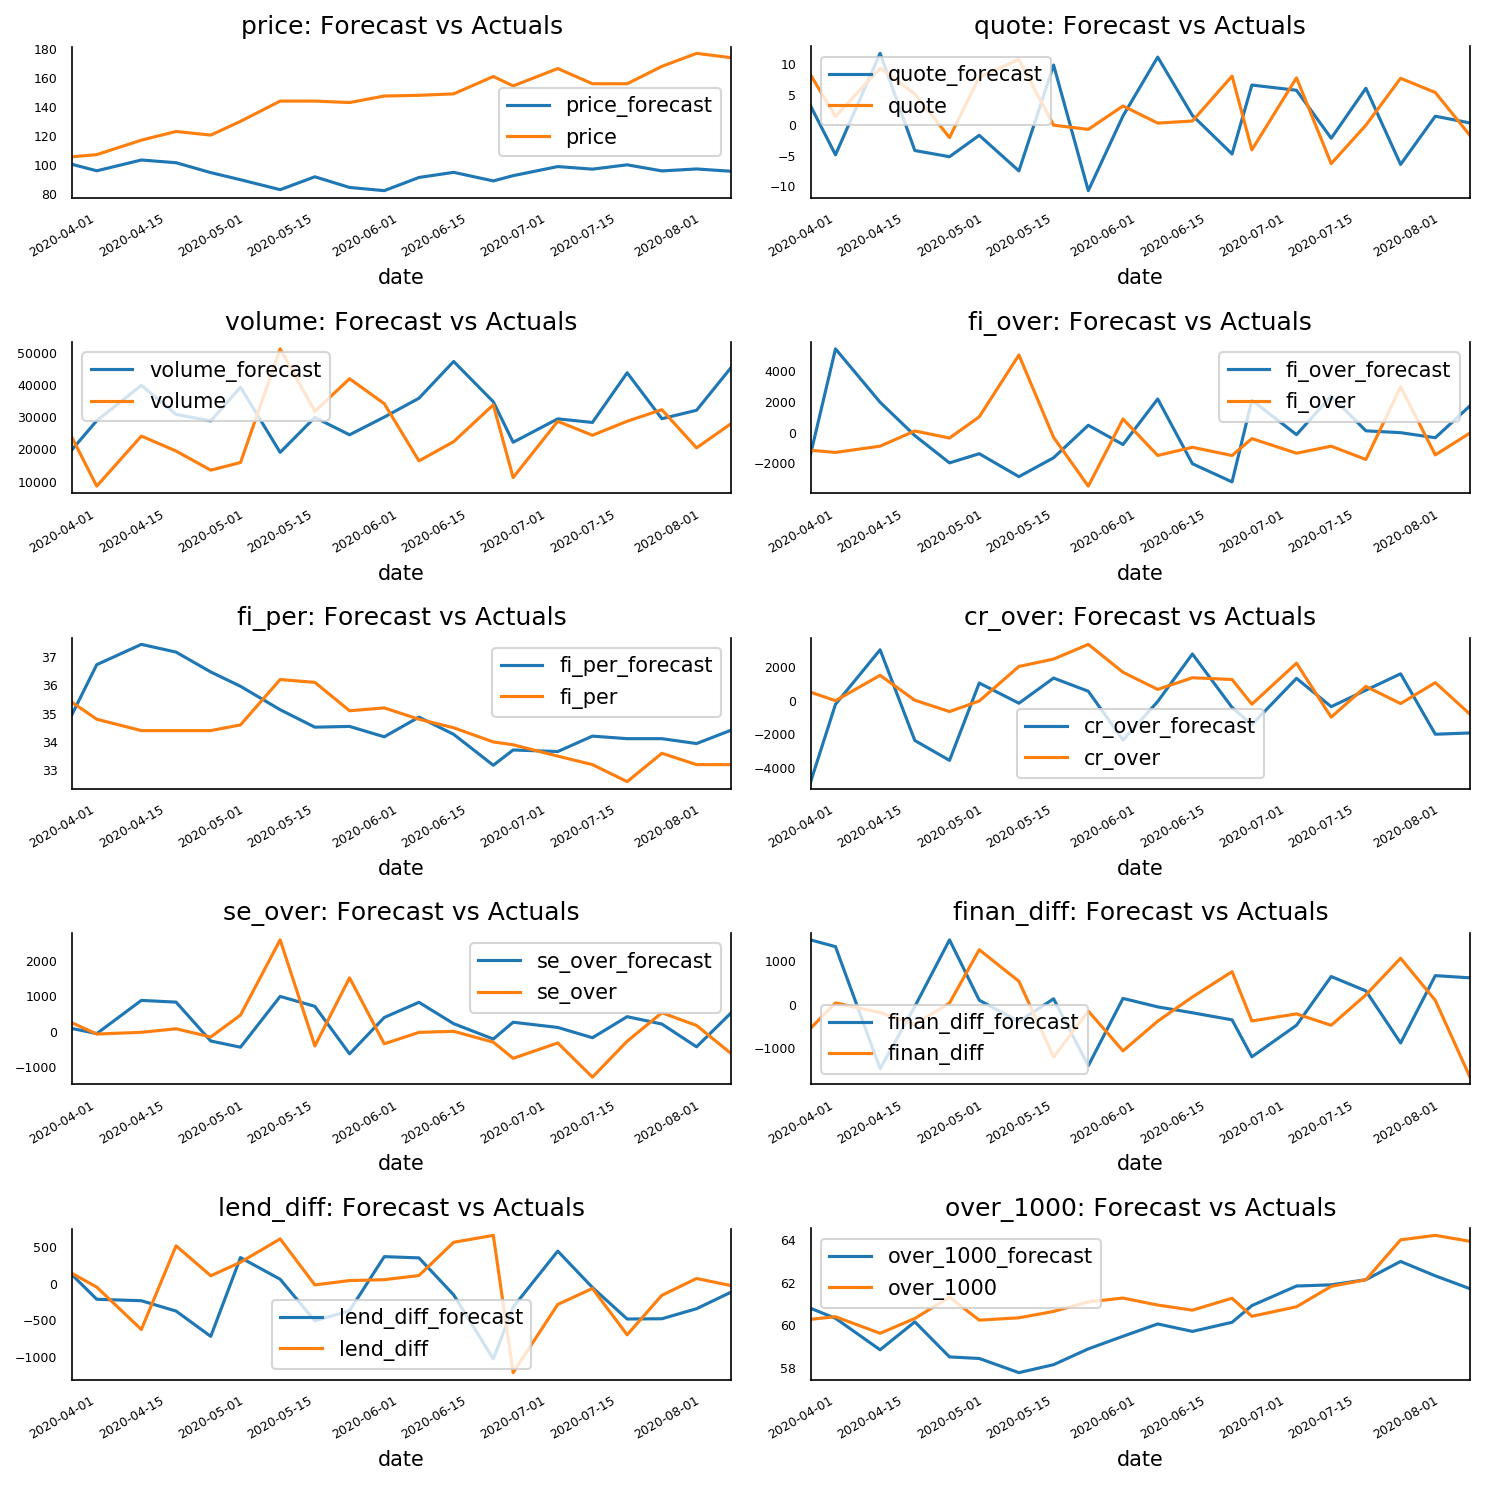

In [22]:
fig, axes= plt.subplots(nrows=int(len(df1.columns)/2), ncols=2, dpi=150, figsize=(10, 10))
for i, (col, ax) in enumerate(zip(df1.columns, axes.flatten())):
    df_result[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x', tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col+ ': Forecast vs Actuals')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();